# LGMVIP, June 2023


# Data Science Intern


# Name: Dhinesh Kumar A R

### Task 1:Iris Flowers Classification ML Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
import csv
import warnings
import seaborn as sb
warnings.filterwarnings("ignore")
sb.set()

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [6]:
columns = ["sepal length", "sepal width", "petal length", "petal width", "species"]
iris = pd.read_csv(r'C:\Users\Admin\Downloads\iris.data', names = columns)
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
x = iris.iloc[:, [0, 1, 2, 3]].values
y = iris.iloc[:, -1].values

In [10]:
print("Total Dataset Summary in Stats")
iris.describe()

Total Dataset Summary in Stats


,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
iris_species = pd.crosstab(index=iris["species"], columns="count")
iris_species

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [13]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]

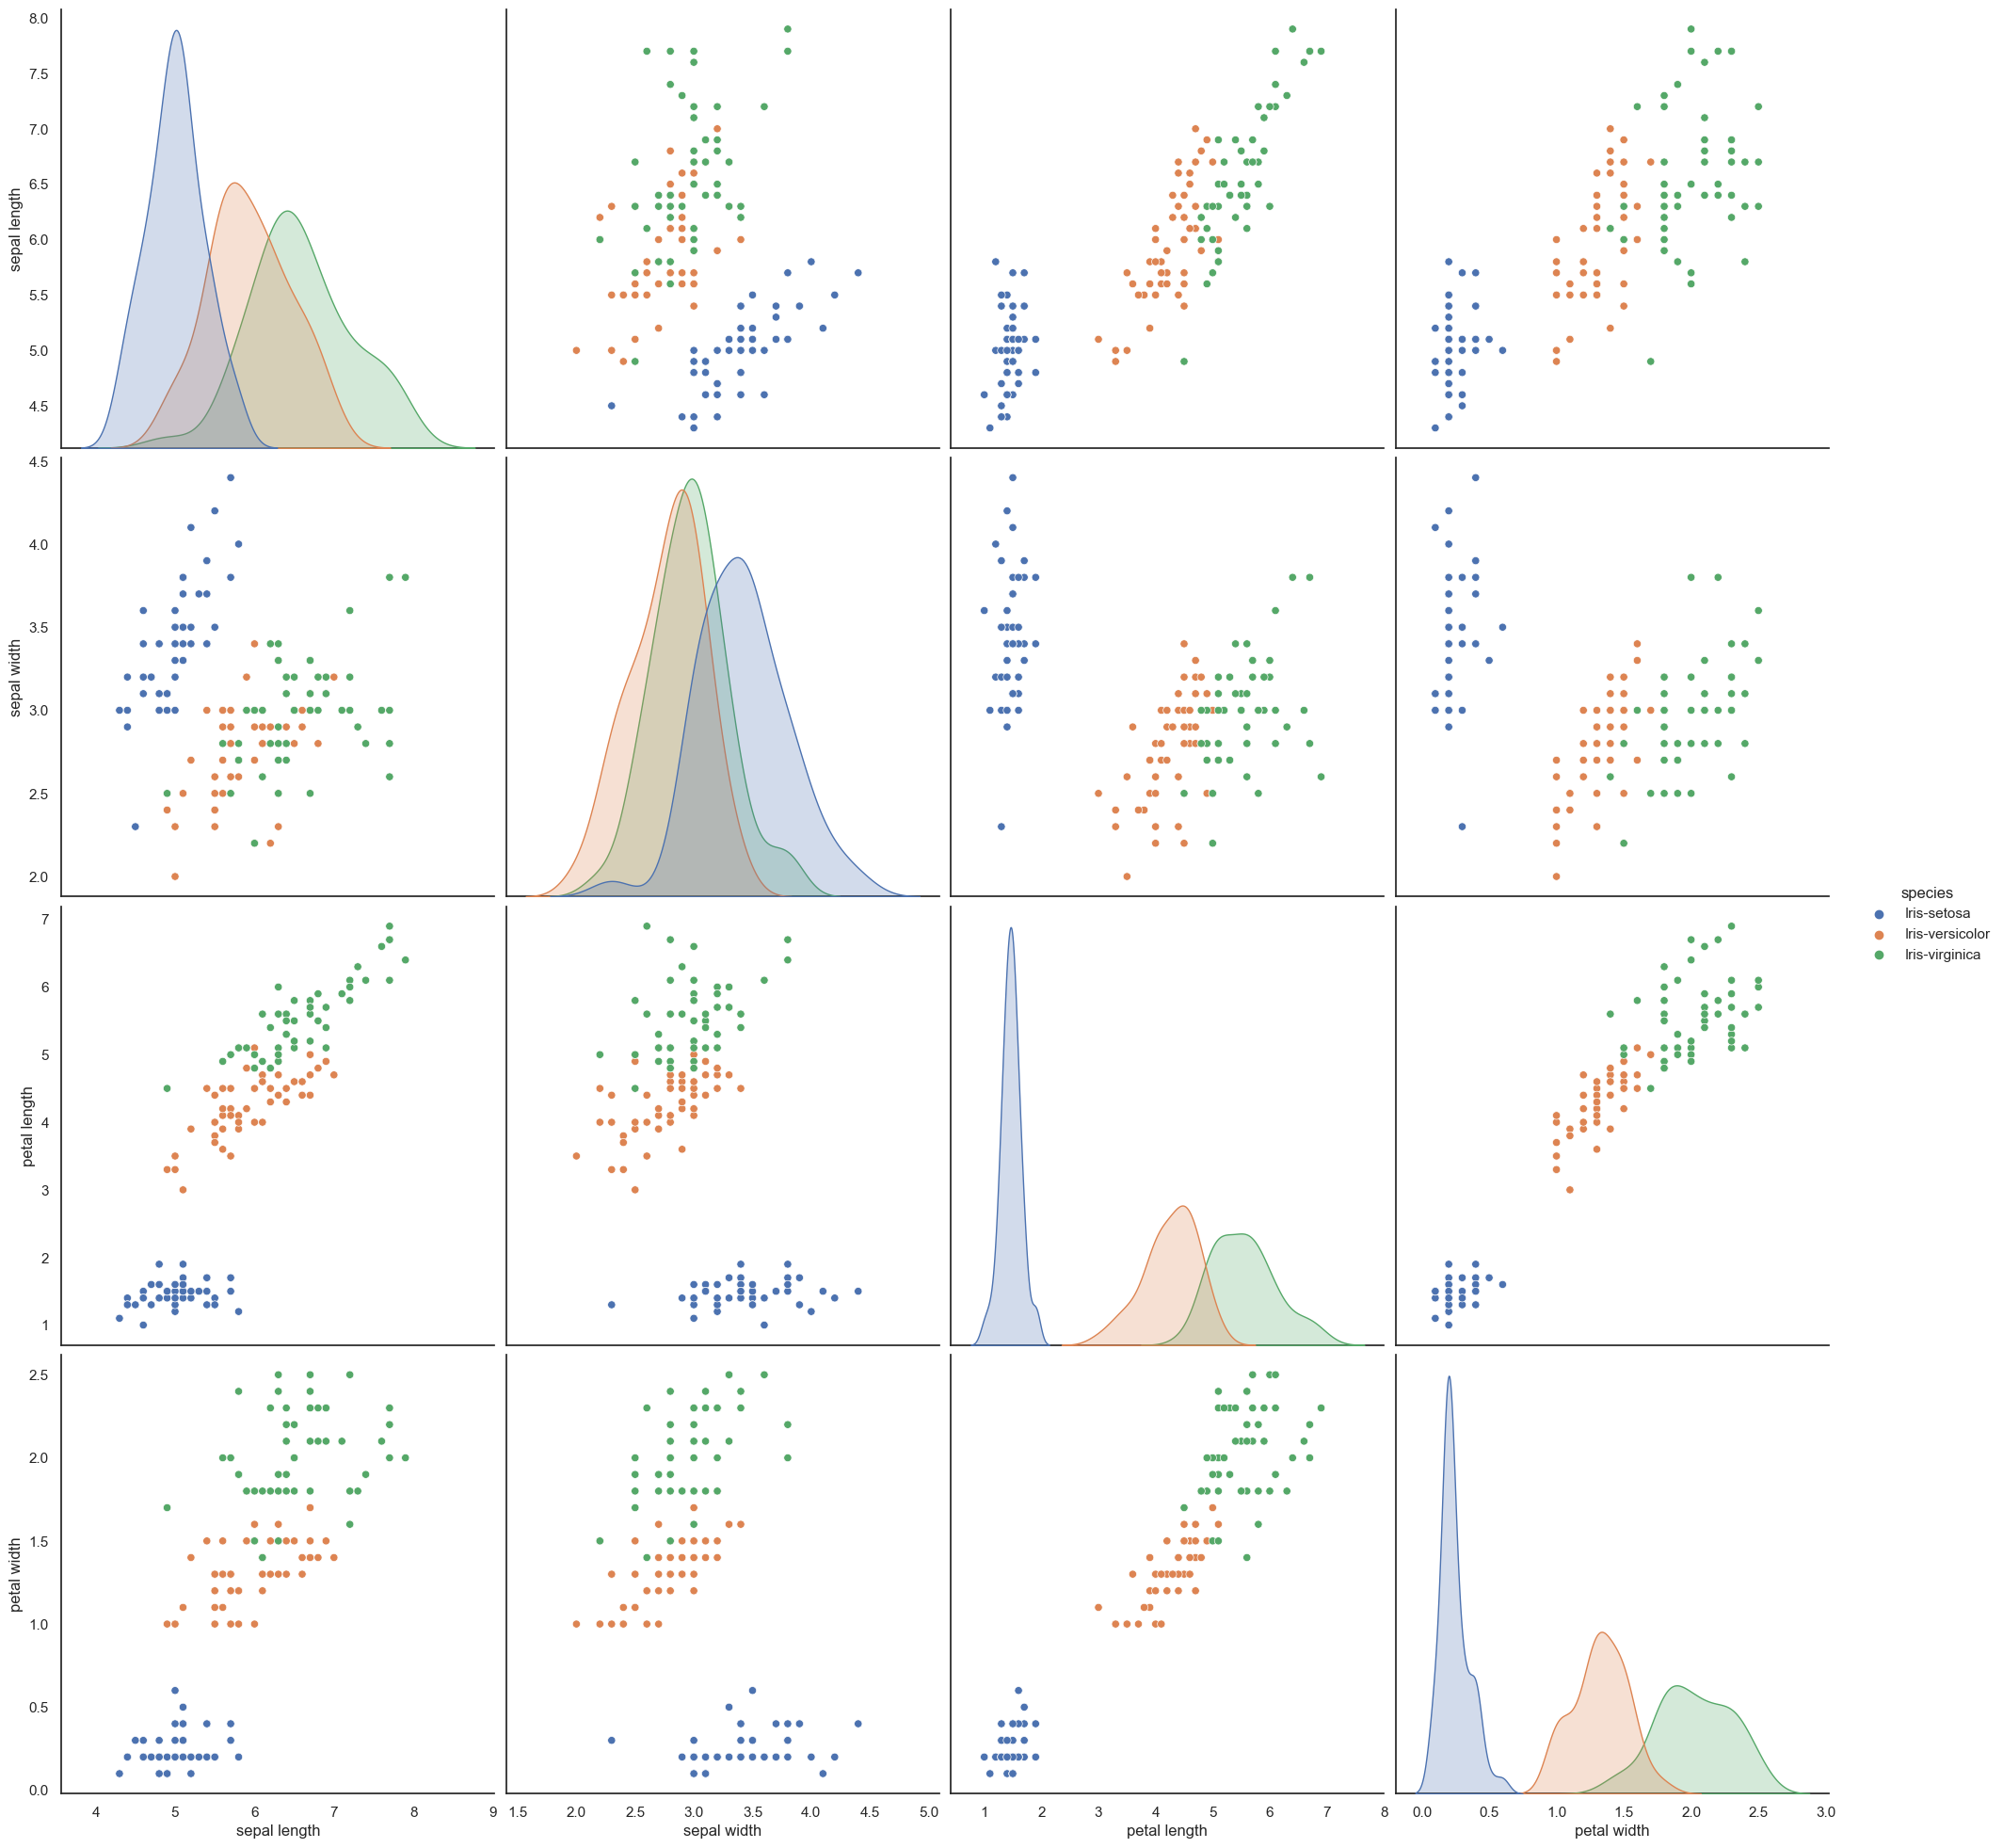

In [16]:
sb.set_style("white")
sb.pairplot(iris, hue="species", height=5);
py.show()

In [17]:
iris.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


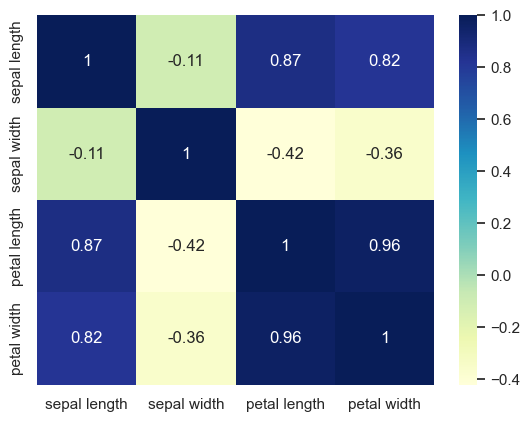

In [18]:
sb.hmap(iris.corr(), annot = True, cmap = "YlGnBu")
py.show()

In [19]:
gd = iris.groupby("species").mean()
print(gd)

                 sepal length  sepal width  petal length  petal width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


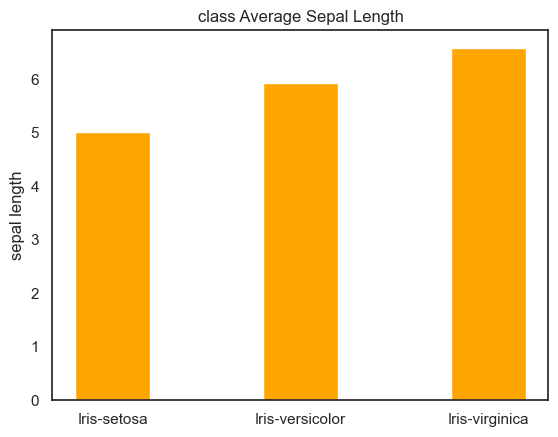

In [21]:
py.bar(gd.index, gd["sepal length"], width=0.4, color = "orange")                                  

py.title("class Average Sepal Length")
py.ylabel("sepal length")
py.show()

In [23]:
ot=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters =i, init = "k-means++", max_iter = 300, n_init = 10, random_state=0)
    kmeans.fit(x)
    ot.append(kmeans.inertia_)
ot

[680.8244,
 152.36870647733906,
 78.94084142614601,
 57.31787321428571,
 46.56163015873016,
 38.930963049671746,
 34.19068792479663,
 30.06387443273313,
 27.842356060606065,
 26.048202248044355]

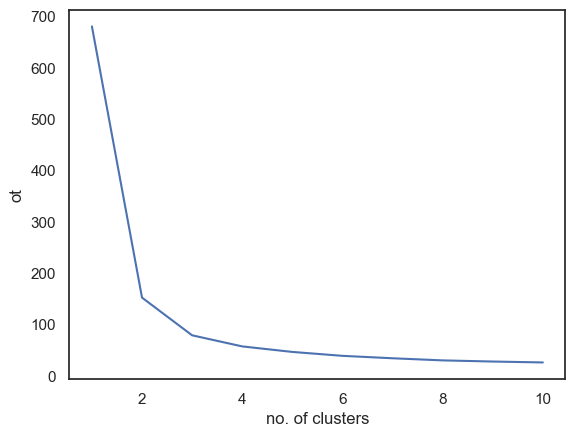

In [25]:
py.plot(range(1,11), ot)
py.xlabel("no. of clusters")
py.ylabel("ot")
py.show()

In [26]:
kmeans = KMeans(n_clusters= i, init = 'k-means++', max_iter = 500, n_init= 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

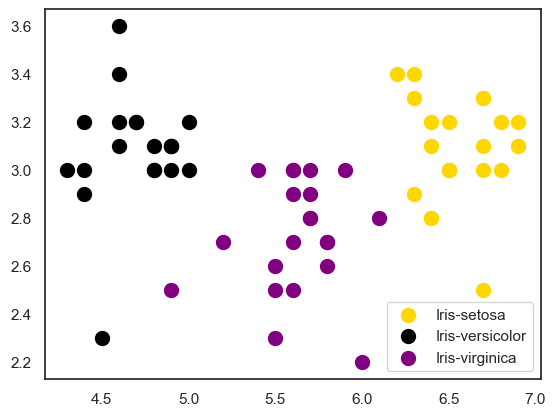

In [28]:
py.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='gold', label='Iris-setosa')
py.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='black', label='Iris-versicolor')
py.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='purple', label='Iris-virginica')


py.legend()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x,y ,test_size= 0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [36]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred
accuracy = accuracy_score(y_test, pred)
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [37]:
print("accuracy :-", accuracy*100)

accuracy :- 97.77777777777777
